# Credit card lead prediction
**Problem Statement** - **To predict whether the customer is interested in using credit card or not**

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv("train_s3TEQDk.csv")
df2 = pd.read_csv("test_mSzZ8RL.csv")

# Data description
* ID -Unique Identifier for a row

* Gender - Gender of the Customer

* Age - Age of the Customer (in Years)

* Region_Code - Code of the Region for the customers

* Occupation - Occupation Type for the customer

* Channel_Code - Acquisition Channel Code for the Customer (Encoded)

* Vintage - Vintage for the Customer (In Months)

* Credit_Product - If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)

* Avg_Account_Balance - Average Account Balance for the Customer in last 12 Months

* Is_Active - If the Customer is Active in last 3 Months

* Is_Lead(Target) -Customer is interested for the Credit Card 0:Customer is not interested 1:Customer is interested

In [4]:
df1.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
df2.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


# Basic information and outlier detection 

In [6]:
df1.shape

(245725, 11)

In [7]:
df2.shape

(105312, 10)

In [8]:
df1.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [9]:
df2.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

In [10]:
df1.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [11]:
df2.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [12]:
#categorical features
categorical = df1.select_dtypes(include=[np.object])
print("Categorical Features in train dataset:",categorical.shape[1])
print(categorical.columns)

#numerical features
numerical = df1.select_dtypes(include=[np.float64,np.int64])
print("Numerical Features in train dataset", numerical.shape[1])
print(numerical.columns)

Categorical Features in train dataset: 7
Index(['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
       'Credit_Product', 'Is_Active'],
      dtype='object')
Numerical Features in train dataset 4
Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead'], dtype='object')


In [13]:
#categorical features
categorical = df2.select_dtypes(include=[np.object])
print("Categorical Features in test dataset:",categorical.shape[1])

#numerical features
numerical = df2.select_dtypes(include=[np.float64,np.int64])
print("Numerical Features in test dataset", numerical.shape[1])

Categorical Features in test dataset: 7
Numerical Features in test dataset 3


In [14]:
df1.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [15]:
df2.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [16]:
df1['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [17]:
df1['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [18]:
df2['Credit_Product'].value_counts()

No     61608
Yes    31182
Name: Credit_Product, dtype: int64

In [19]:
df2['Credit_Product'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [20]:
#replacing null values
df1['Credit_Product'] = df1['Credit_Product'].fillna(df1['Credit_Product'].mode()[0])
df2['Credit_Product'] = df2['Credit_Product'].fillna(df2['Credit_Product'].mode()[0])

In [21]:
df1.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [22]:
df2.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

# Univariate analysis on train set

<AxesSubplot:xlabel='Age', ylabel='Density'>

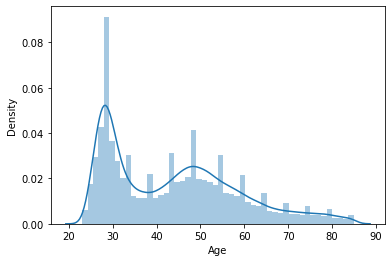

In [23]:
sns.distplot(df1['Age'])

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

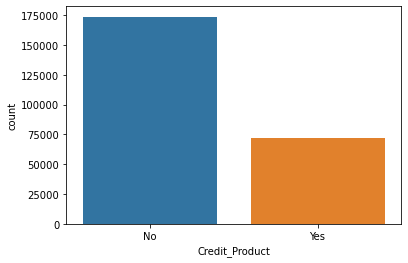

In [24]:
sns.countplot(df1['Credit_Product'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

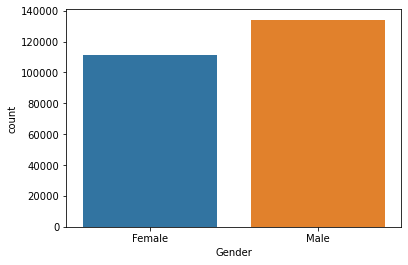

In [25]:
sns.countplot(df1['Gender'])

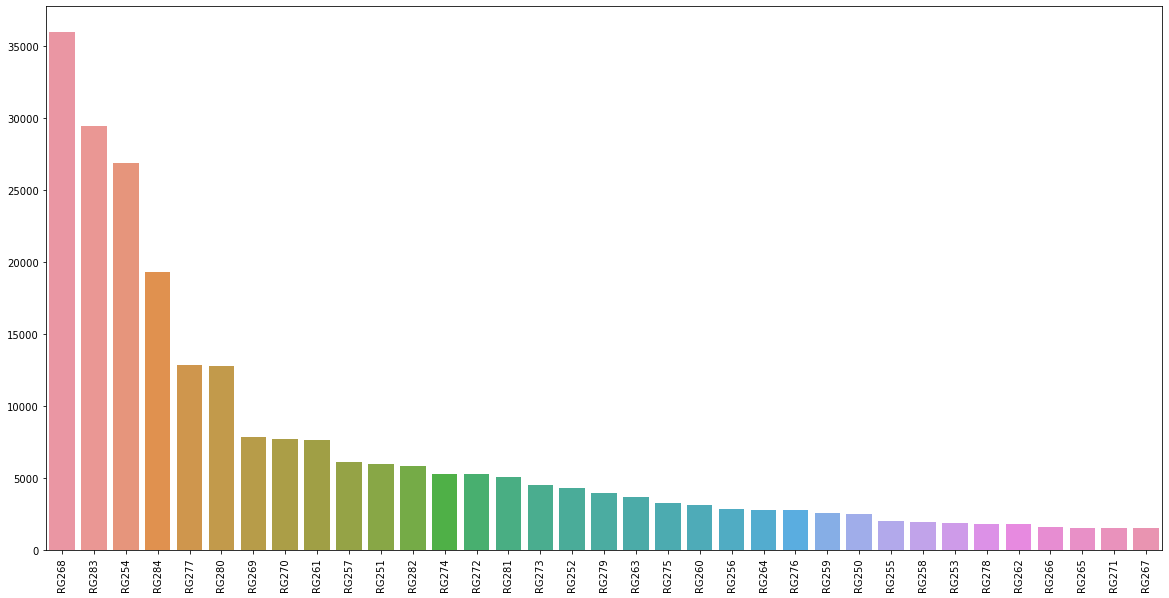

In [26]:
region = df1['Region_Code'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(region.index,region.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Occupation'>

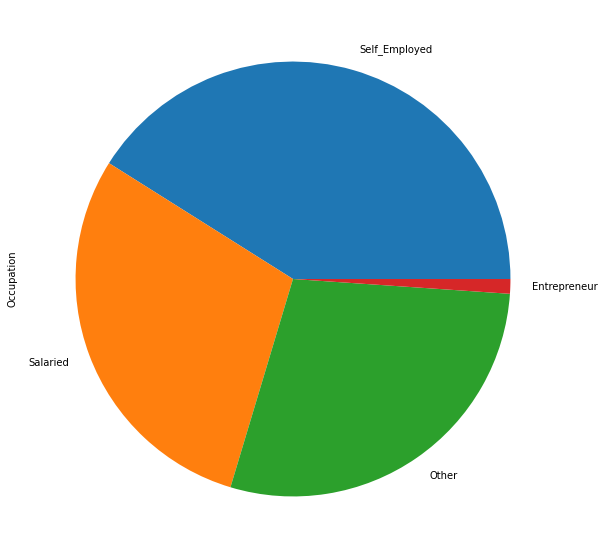

In [27]:
occupation = df1['Occupation'].value_counts()
occupation.plot(kind="pie",figsize=(20,10))

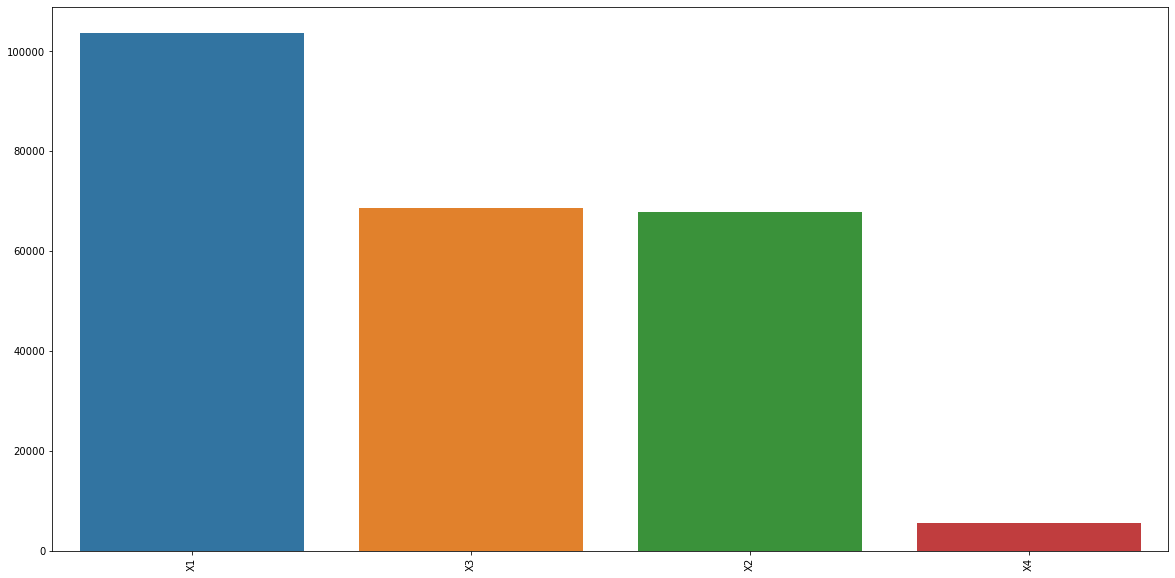

In [28]:
channel = df1['Channel_Code'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(channel.index,channel.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

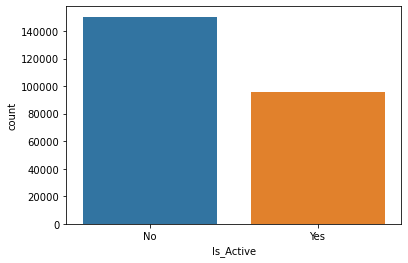

In [29]:
sns.countplot(df1['Is_Active'])

<AxesSubplot:xlabel='Vintage'>

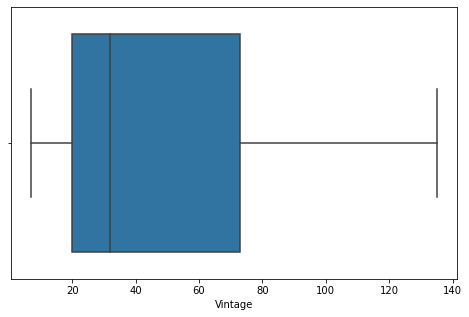

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(df1['Vintage'])

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

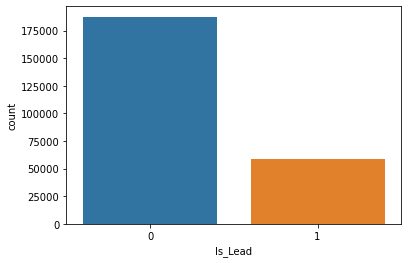

In [31]:
sns.countplot(df1['Is_Lead'])

<AxesSubplot:xlabel='Age'>

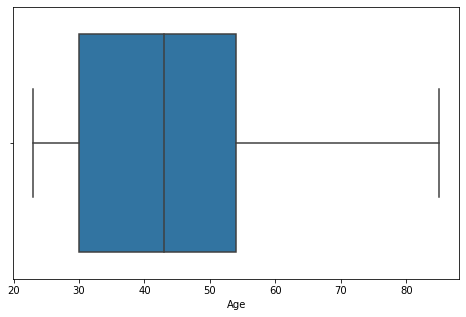

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(df1['Age'])

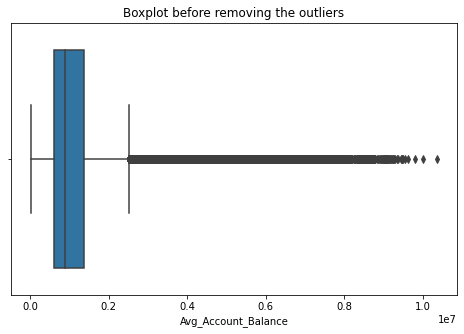

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(df1['Avg_Account_Balance'])
plt.title('Boxplot before removing the outliers')
plt.show()

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

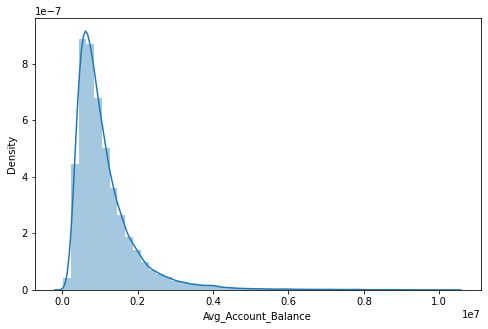

In [34]:
plt.figure(figsize=(8,5))
sns.distplot(df1['Avg_Account_Balance'])

# Bivariate analysis on train set

<AxesSubplot:xlabel='Gender', ylabel='Age'>

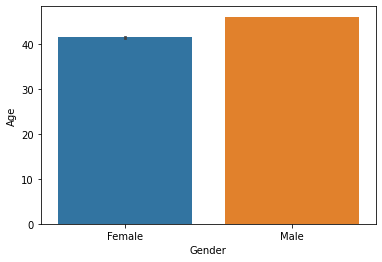

In [35]:
sns.barplot(y='Age',x='Gender',data=df1)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

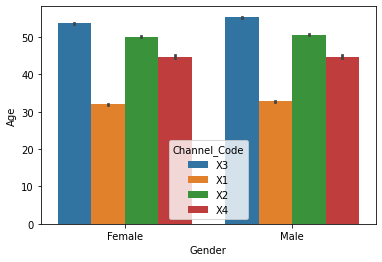

In [36]:
sns.barplot(y='Age',x='Gender',hue='Channel_Code',data=df1)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

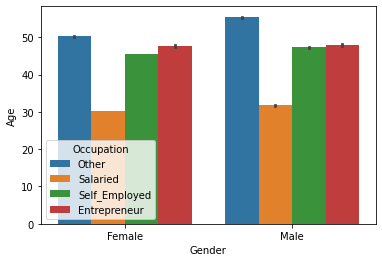

In [37]:
sns.barplot(y='Age',x='Gender',hue='Occupation',data=df1)

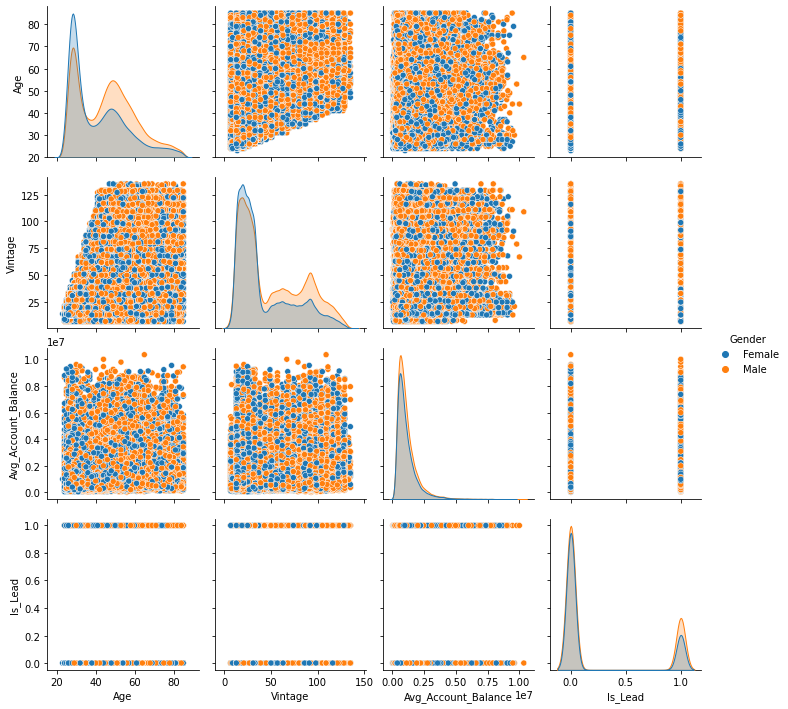

In [38]:
sns.pairplot(df1,hue="Gender")

In [39]:
oc1 = df1.groupby(['Gender','Occupation'])['Credit_Product'].value_counts()
oc1

Gender  Occupation     Credit_Product
Female  Entrepreneur   Yes                 612
                       No                  375
        Other          No                21818
                       Yes                8605
        Salaried       No                31628
                       Yes                7868
        Self_Employed  No                27402
                       Yes               13220
Male    Entrepreneur   Yes                1037
                       No                  643
        Other          No                26934
                       Yes               12816
        Salaried       No                25011
                       Yes                7492
        Self_Employed  No                39871
                       Yes               20393
Name: Credit_Product, dtype: int64

In [40]:
oc2 = df1.groupby(['Gender','Channel_Code'])['Is_Active'].value_counts()
oc2

Gender  Channel_Code  Is_Active
Female  X1            No           45464
                      Yes          12751
        X2            Yes          12520
                      No           11877
        X3            No           13502
                      Yes          13249
        X4            No            1198
                      Yes            967
Male    X1            No           35250
                      Yes          10253
        X2            Yes          22319
                      No           21010
        X3            Yes          21745
                      No           20216
        X4            No            1773
                      Yes           1631
Name: Is_Active, dtype: int64

In [41]:
oc1 = df1.groupby(['Gender','Occupation'])['Is_Lead'].value_counts()
oc1

Gender  Occupation     Is_Lead
Female  Entrepreneur   1            651
                       0            336
        Other          0          24083
                       1           6340
        Salaried       0          34413
                       1           5083
        Self_Employed  0          29991
                       1          10631
Male    Entrepreneur   1           1111
                       0            569
        Other          0          28901
                       1          10849
        Salaried       0          26090
                       1           6413
        Self_Employed  0          43054
                       1          17210
Name: Is_Lead, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Vintage'>

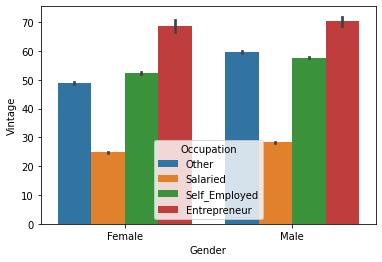

In [42]:
sns.barplot(y='Vintage',x='Gender',hue='Occupation',data=df1)

<AxesSubplot:xlabel='Is_Active', ylabel='Is_Lead'>

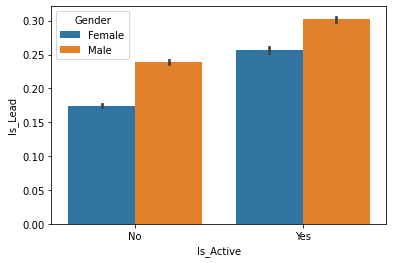

In [43]:
sns.barplot(y='Is_Lead',x='Is_Active',hue='Gender',data=df1)

# Univariate analysis on test set

<AxesSubplot:xlabel='Age', ylabel='Density'>

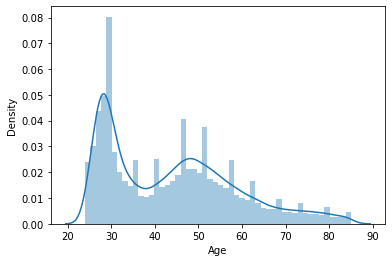

In [44]:
sns.distplot(df2['Age'])

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

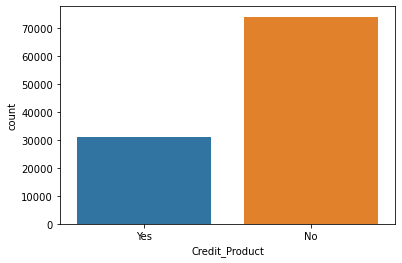

In [45]:
sns.countplot(df2['Credit_Product'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

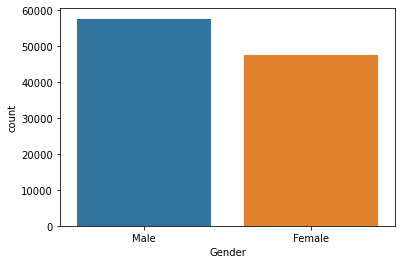

In [46]:
sns.countplot(df2['Gender'])

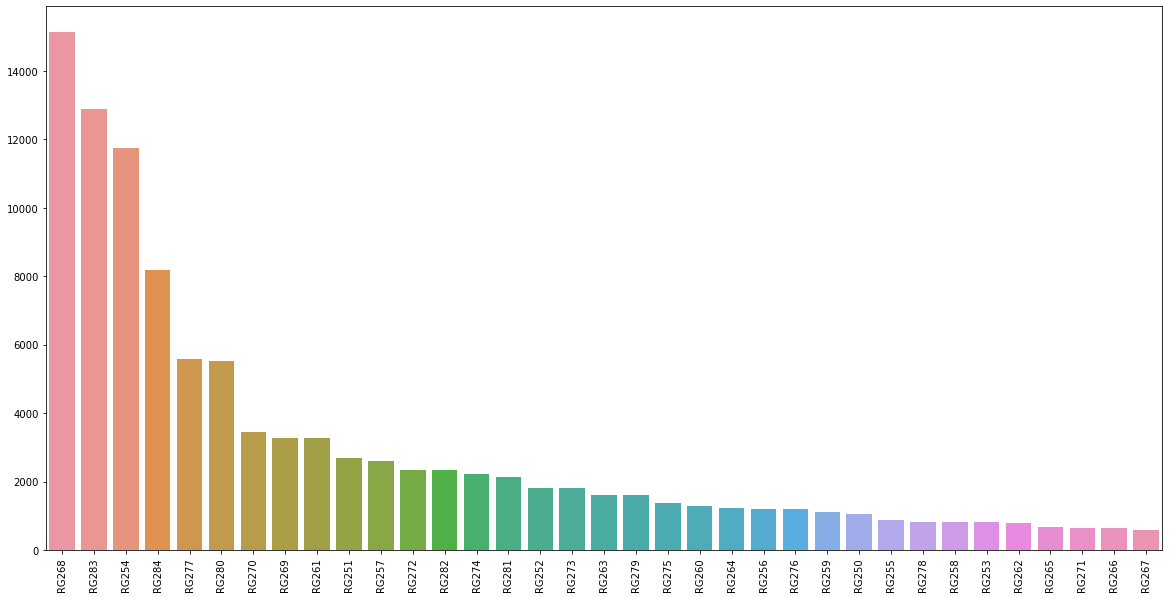

In [47]:
region = df2['Region_Code'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(region.index,region.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Occupation'>

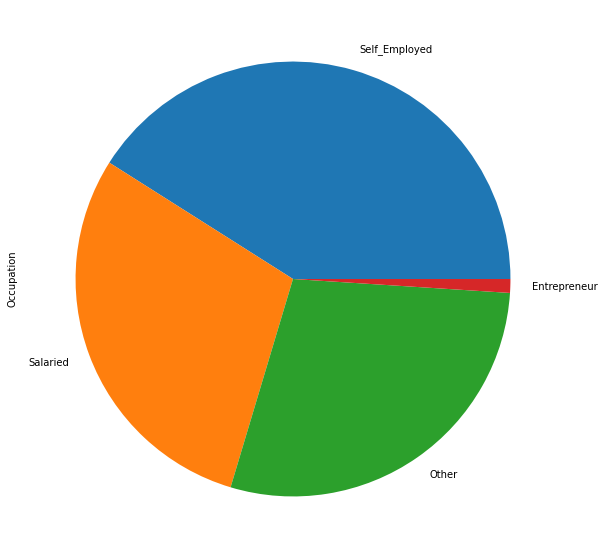

In [48]:
occupation = df2['Occupation'].value_counts()
occupation.plot(kind="pie",figsize=(20,10))

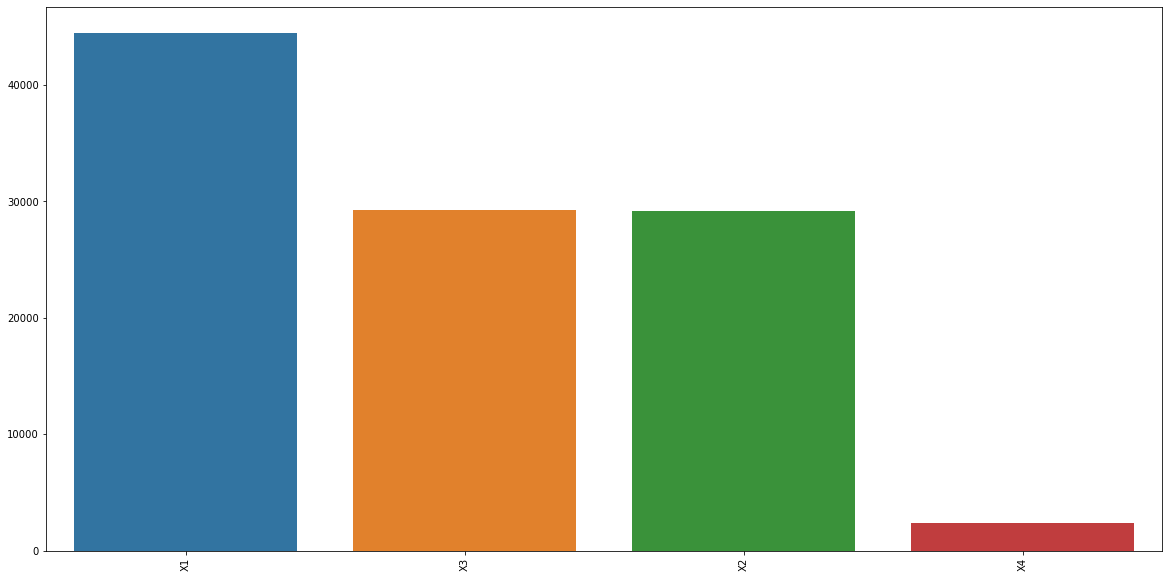

In [49]:
channel = df2['Channel_Code'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(channel.index,channel.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

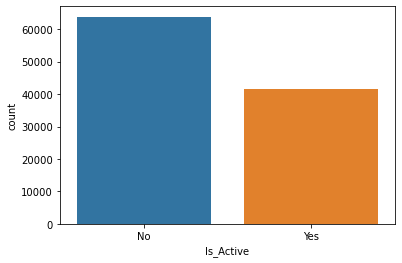

In [50]:
sns.countplot(df2['Is_Active'])

<AxesSubplot:xlabel='Vintage'>

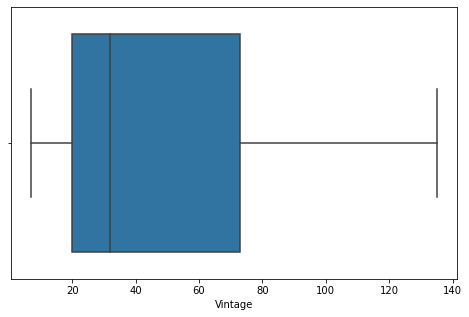

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(df2['Vintage'])

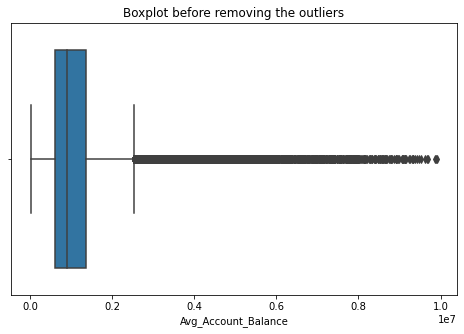

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(df2['Avg_Account_Balance'])
plt.title('Boxplot before removing the outliers')
plt.show()

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

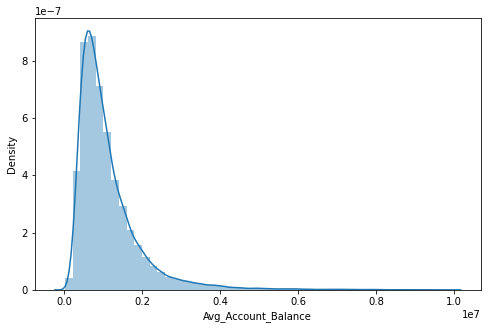

In [53]:
plt.figure(figsize=(8,5))
sns.distplot(df2['Avg_Account_Balance'])

# Bivariate analysis on test set

<AxesSubplot:xlabel='Gender', ylabel='Age'>

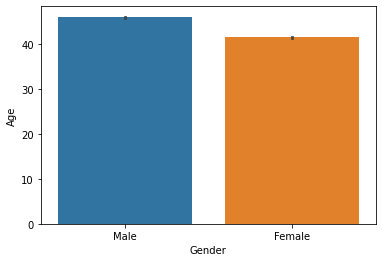

In [54]:
sns.barplot(y='Age',x='Gender',data=df2)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

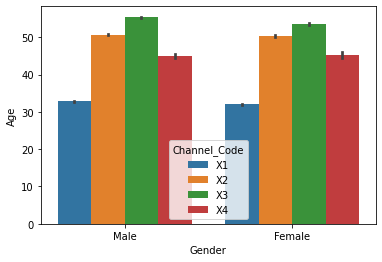

In [55]:
sns.barplot(y='Age',x='Gender',hue='Channel_Code',data=df2)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

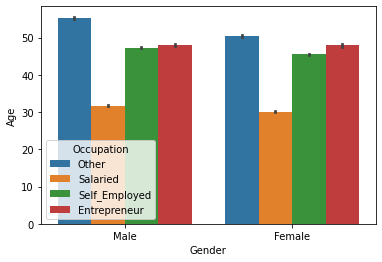

In [56]:
sns.barplot(y='Age',x='Gender',hue='Occupation',data=df2)

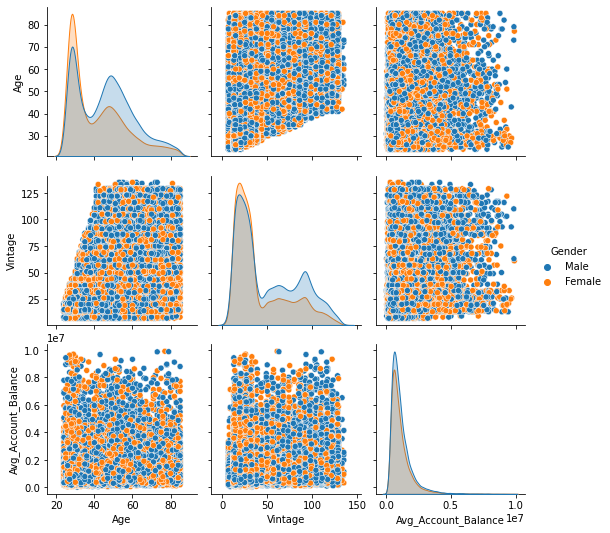

In [57]:
sns.pairplot(df2,hue="Gender")

In [58]:
oc1 = df2.groupby(['Gender','Occupation'])['Credit_Product'].value_counts()
oc1

Gender  Occupation     Credit_Product
Female  Entrepreneur   Yes                 216
                       No                  146
        Other          No                 9288
                       Yes                3695
        Salaried       No                13502
                       Yes                3380
        Self_Employed  No                11666
                       Yes                5714
Male    Entrepreneur   Yes                 436
                       No                  278
        Other          No                11501
                       Yes                5647
        Salaried       No                10723
                       Yes                3308
        Self_Employed  No                17026
                       Yes                8786
Name: Credit_Product, dtype: int64

In [59]:
oc2 = df2.groupby(['Gender','Channel_Code'])['Is_Active'].value_counts()
oc2

Gender  Channel_Code  Is_Active
Female  X1            No           19354
                      Yes           5492
        X2            Yes           5394
                      No            5114
        X3            Yes           5709
                      No            5633
        X4            No             507
                      Yes            404
Male    X1            No           15088
                      Yes           4550
        X2            Yes           9825
                      No            8843
        X3            Yes           9437
                      No            8490
        X4            No             768
                      Yes            704
Name: Is_Active, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Vintage'>

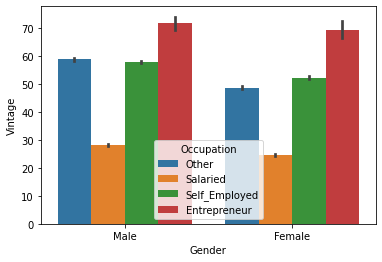

In [60]:
sns.barplot(y='Vintage',x='Gender',hue='Occupation',data=df2)

# Observations from EDA:
**Train and Test Dataset:**
* The train set has a size of 245725 rows 11 columns with 7 categorical variables and 4 numerical variables.
* The test set has a size of 105312 rows 10 columns with 7 categorical variables and 3 numerical variables.
* ***IS_LEAD*** is taken as the target variable.
* Normal plot of age gives a info that more users are in the age of 25 to 35.
* Maximum number of users are free from home loan, credit loan etc..
* More Male credit card users than female credit card users.
* Region 268 has more number of credit card users.
* Most of the people in the dataset are self-employed.
* Very few people are interested in Entrepreneurship.
* The Channel X1 has more credit card users compared to other channels.
* Unique ID of users not play any role in our prediction. So it is open to drop.
* The vintage period has a median of 35 months.
* According to Train dataset, only few users are willing to use the credit card.
* The age has a median of 42.
* The average account balance of the individual is heavily biased with outliers, it is removed using inter quartile range.
* Every user has an average account balance of 100k.
* Maximum age for a male is 45 ,whereas for a female is 42.
* Pair plot explains the women's dominance over men.
* Comparing to other professions, Entrepreneurs are using credir_product in a higher manner.
* X1 channel has many female users than male users.
* Most of them are not interested in using credit cards.
* Vintage period for an Entreprenueur is high compared to other professionals, Means they are all been a customer for a long term.
* Men are highly interested in using credit card compared to women.

# Label encoding all values

In [61]:
#we don't want ID so we can drop that.
df1 = df1.drop(["ID","Avg_Account_Balance"],axis=1)
df2 = df2.drop(["ID","Avg_Account_Balance"],axis=1)

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
df1['Gender']=le.fit_transform(df1['Gender'])
df1['Region_Code']=le.fit_transform(df1['Region_Code'])
df1['Occupation']=le.fit_transform(df1['Occupation'])
df1['Channel_Code']=le.fit_transform(df1['Channel_Code'])
df1['Credit_Product']=le.fit_transform(df1['Credit_Product'])
df1['Is_Active']= le.fit_transform(df1['Is_Active'])

In [64]:
df2['Gender']=le.fit_transform(df2['Gender'])
df2['Region_Code']=le.fit_transform(df2['Region_Code'])
df2['Occupation']=le.fit_transform(df2['Occupation'])
df2['Channel_Code']=le.fit_transform(df2['Channel_Code'])
df2['Credit_Product']=le.fit_transform(df2['Credit_Product'])
df2['Is_Active']= le.fit_transform(df2['Is_Active'])

<AxesSubplot:>

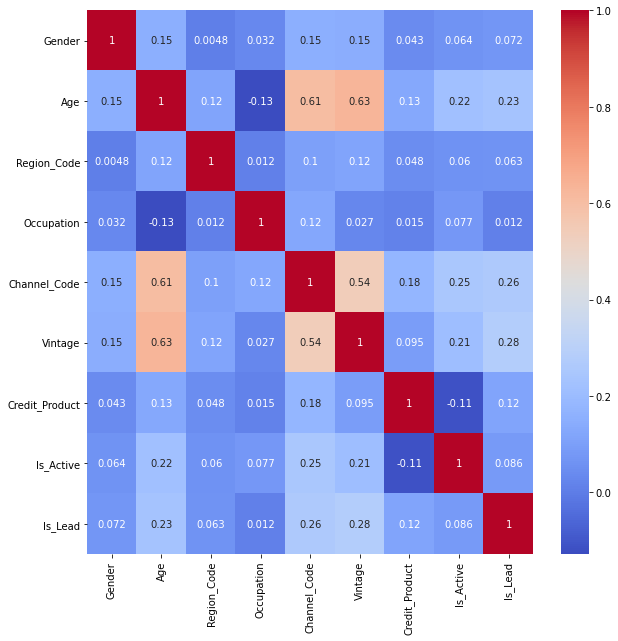

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm")

<AxesSubplot:>

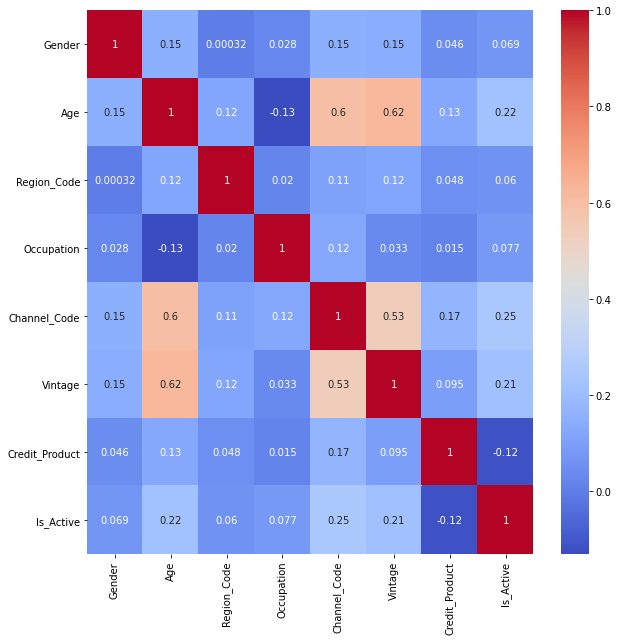

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True,cmap="coolwarm")

In [67]:
df1.shape

(245725, 9)

In [68]:
target = df1['Is_Lead']
data = df1.drop("Is_Lead",axis=1)

In [69]:
target.shape

(245725,)

In [70]:
data.shape

(245725, 8)

In [71]:
df1.head(20)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,0,0
1,0,30,27,2,0,32,0,0,0
2,0,56,18,3,2,26,0,1,0
3,1,34,20,2,0,19,0,0,0
4,0,30,32,2,0,33,0,0,0
5,1,56,11,3,0,32,0,1,0
6,1,62,32,1,2,20,0,1,1
7,0,48,15,3,2,13,0,1,0
8,0,40,33,3,1,38,0,0,0
9,0,55,18,3,1,49,1,0,0


# Train and validation test split

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(data,target,test_size=0.20,random_state=0)

# Model selection
**Logistic Regression**

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [74]:
x_pred = lr.predict(x_train)
y_pred = lr.predict(x_valid)

In [75]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_valid,y_pred))

Training accuracy: 0.7558093397090243
Testing accuracy: 0.7562519076203073


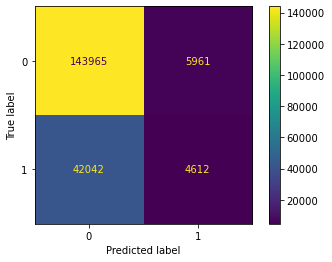

In [76]:
plot_confusion_matrix(lr,x_train,y_train,values_format='d')

In [77]:
lr.predict([[1,33,18,3,1,69,0,1]])

array([0], dtype=int64)

**Random forest classifier**

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [79]:
x_pred = rf.predict(x_train)
y_pred = rf.predict(x_valid)

In [80]:
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_valid,y_pred))

Training accuracy: 0.9563892562824295
Testing accuracy: 0.7635568216502188


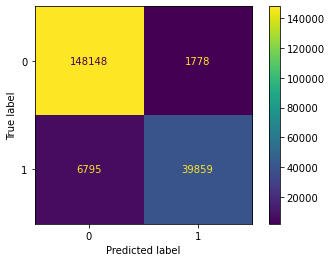

In [81]:
plot_confusion_matrix(rf,x_train,y_train,values_format='d')

In [82]:
rf.predict([[0,59,33,1,2,15,1,0]])

array([1], dtype=int64)

**Stochastic gradient classifier**

In [83]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="modified_huber",shuffle=True,random_state=101)
sgd.fit(x_train,y_train)

SGDClassifier(loss='modified_huber', random_state=101)

In [84]:
x_pred = sgd.predict(x_train)
y_pred = sgd.predict(x_valid)

In [85]:
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_valid,y_pred))

Training accuracy: 0.6081849628649914
Testing accuracy: 0.6058398616339404


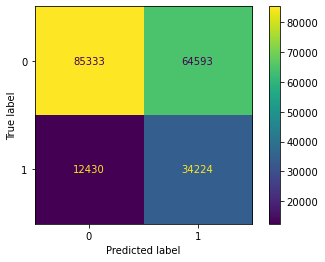

In [86]:
plot_confusion_matrix(sgd,x_train,y_train,values_format='d')

In [87]:
sgd.predict([[1,62,32,1,2,20,0,1]])

array([0], dtype=int64)

**Naive bayes**

In [88]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [89]:
x_pred = nb.predict(x_train)
y_pred = nb.predict(x_valid)

In [90]:
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_valid,y_pred))

Training accuracy: 0.7176925424763455
Testing accuracy: 0.7155560077322209


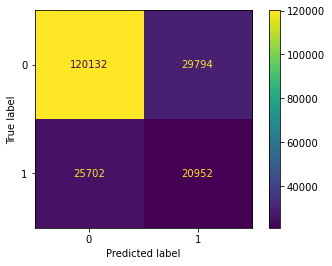

In [91]:
plot_confusion_matrix(nb,x_train,y_train,values_format='d')

In [92]:
nb.predict([[1,62,32,1,2,20,0,1]])

array([0], dtype=int64)

**K-nearest neighbours**

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [94]:
x_pred = knn.predict(x_train)
y_pred = knn.predict(x_valid)

In [95]:
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_valid,y_pred))

Training accuracy: 0.7900193305524469
Testing accuracy: 0.7644521314477566


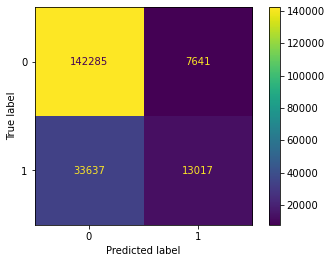

In [96]:
plot_confusion_matrix(knn,x_train,y_train,values_format='d')

In [97]:
knn.predict([[0,59,33,1,2,15,1,0]])

array([1], dtype=int64)

**Decision tree classifier**

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [99]:
x_pred = dt.predict(x_train)
y_pred = dt.predict(x_valid)

In [100]:
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_valid,y_pred))

Training accuracy: 0.9564452131447757
Testing accuracy: 0.7317122799877912


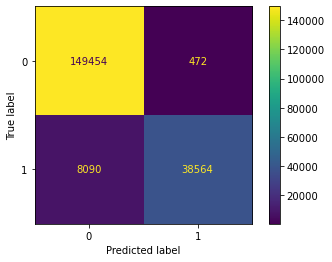

In [101]:
plot_confusion_matrix(dt,x_train,y_train,values_format='d')

In [102]:
dt.predict([[0,27,27,2,0,20,0,1]])

array([0], dtype=int64)

**Neural networks**

In [103]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(x_train,y_train)

MLPClassifier()

In [104]:
x_pred = nn.predict(x_train)
y_pred = nn.predict(x_valid)

In [105]:
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_valid,y_pred))

Training accuracy: 0.7888747583680944
Testing accuracy: 0.7892359344796012


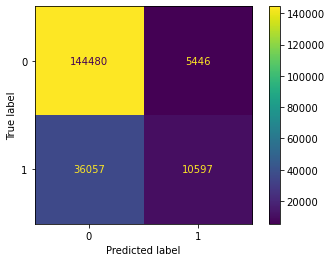

In [106]:
plot_confusion_matrix(nn,x_train,y_train,values_format='d')

In [107]:
nn.predict([[0,46,18,1,2,97,1,0]])

array([1], dtype=int64)

In [108]:
import sklearn as sk
print(sk.__version__)

0.23.1


In [110]:
from sklearn.metrics import classification_report
cr = classification_report(y_valid,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     37511
           1       0.66      0.23      0.34     11634

    accuracy                           0.79     49145
   macro avg       0.73      0.60      0.61     49145
weighted avg       0.77      0.79      0.75     49145

